In [1]:
pip install mne pandas

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [8]:
# necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import signal
import mne
import seaborn as sns


#Model Validation
from sklearn.metrics import log_loss,roc_auc_score,f1_score,recall_score,roc_curve
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,fbeta_score
from sklearn.metrics import precision_score
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix



#ignore the warnings 
import warnings as wr
wr.filterwarnings('ignore')
## for Deep-learing:
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.utils import to_categorical
from keras.optimizers import SGD 
from keras.callbacks import EarlyStopping
from keras.utils import np_utils
import itertools
from keras.layers import LSTM
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers import Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import LSTM, Dense

Extracting EDF parameters from C:\Users\HP\A01T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG, EOG-left, EOG-central, EOG-right
Creating raw.info structure...
Reading 0 ... 672527  =      0.000 ...  2690.108 secs...
<Info | 7 non-empty values
 bads: []
 ch_names: EEG-Fz, EEG-0, EEG-1, EEG-2, EEG-3, EEG-4, EEG-5, EEG-C3, EEG-6, ...
 chs: 25 EEG
 custom_ref_applied: False
 highpass: 0.5 Hz
 lowpass: 100.0 Hz
 meas_date: 2005-01-17 12:00:00 UTC
 nchan: 25
 projs: []
 sfreq: 250.0 Hz
>


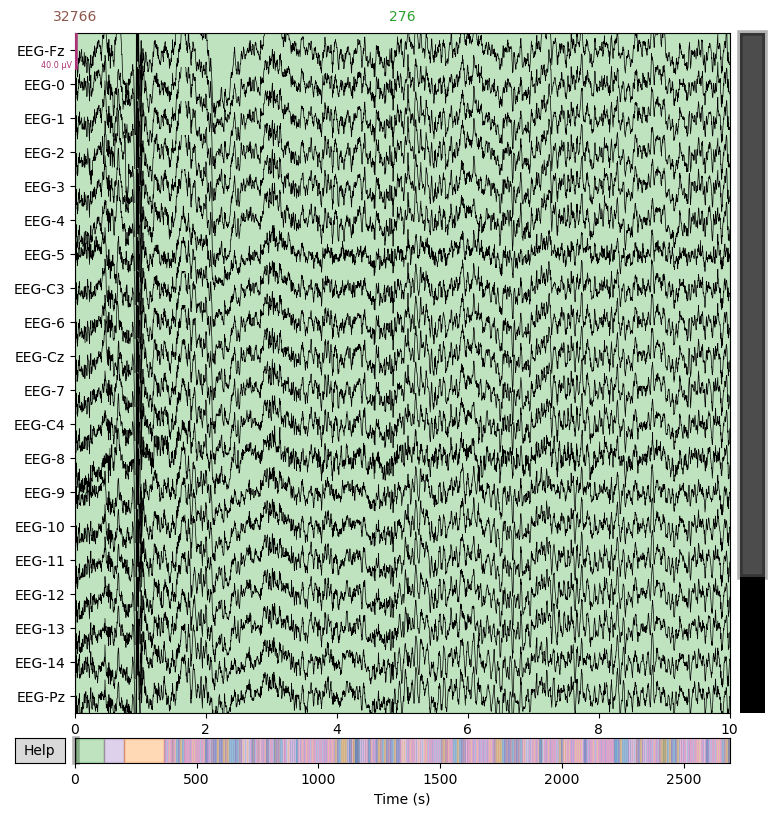

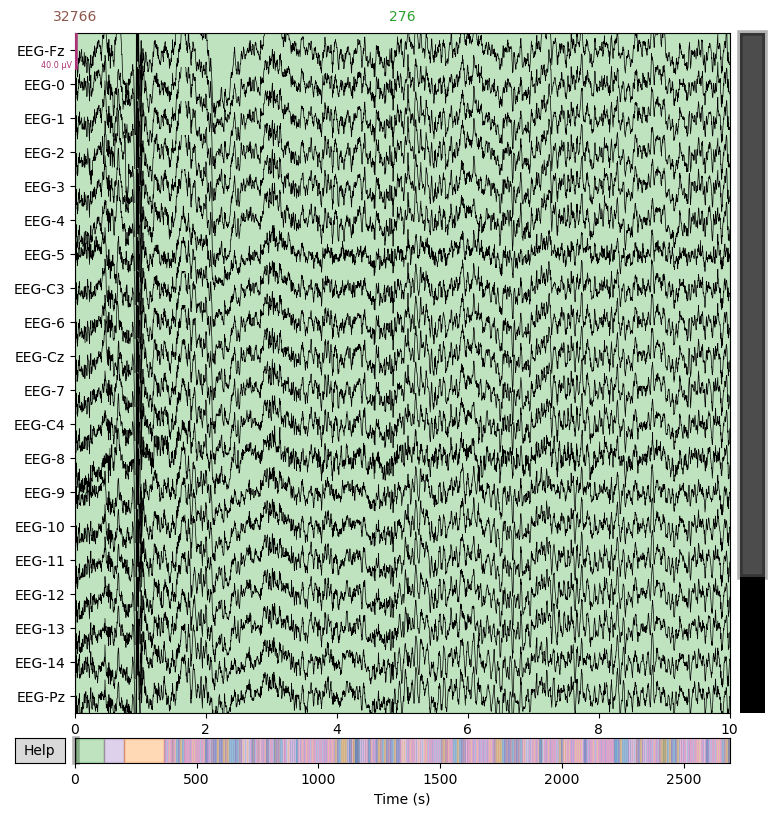

In [9]:


# Replace 'your_file.gdf' with the actual path to your GDF file
gdf_file_path = 'A01T.gdf'

# Load the GDF file
raw = mne.io.read_raw_gdf(gdf_file_path, preload=True)

# Print basic information about the data
print(raw.info)

# Plot the data using MNE's interactive browser
raw.plot()


In [12]:
import mne
import pandas as pd

# Replace 'A01T.gdf' and 'A01T.csv' with the actual file paths
input_gdf_path = 'A01T.gdf'
output_csv_path = 'file.csv'

# Load the GDF file
raw = mne.io.read_raw_gdf(input_gdf_path, preload=True)

# Convert the data to a pandas DataFrame
data = raw.get_data()

# Create a DataFrame from the data
df = pd.DataFrame(data.T, columns=raw.ch_names)
df['Timestamp'] = raw.times

# Save the DataFrame to a CSV file
df.to_csv(output_csv_path, index=False)


Extracting EDF parameters from C:\Users\HP\A01T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG, EOG-left, EOG-central, EOG-right
Creating raw.info structure...
Reading 0 ... 672527  =      0.000 ...  2690.108 secs...


In [13]:
df

EEG-Fz     EEG-0         EEG-1     EEG-2     EEG-3     EEG-4  \
0      -0.000021 -0.000024 -2.148437e-05 -0.000025 -0.000026 -0.000028   
1      -0.000022 -0.000024 -2.431641e-05 -0.000025 -0.000026 -0.000025   
2      -0.000016 -0.000020 -1.884766e-05 -0.000022 -0.000021 -0.000022   
3      -0.000017 -0.000014 -2.036133e-05 -0.000021 -0.000024 -0.000022   
4      -0.000019 -0.000018 -2.041016e-05 -0.000026 -0.000027 -0.000030   
...          ...       ...           ...       ...       ...       ...   
672523 -0.000013 -0.000001 -2.734375e-06 -0.000005 -0.000011 -0.000012   
672524 -0.000009 -0.000001  3.417969e-07 -0.000003 -0.000007 -0.000009   
672525  0.000006  0.000010  1.494141e-05  0.000012  0.000009  0.000006   
672526  0.000001  0.000003  9.228516e-06  0.000008  0.000007  0.000004   
672527  0.000001  0.000004  7.861328e-06  0.000010  0.000010  0.000007   

               EEG-5        EEG-C3     EEG-6        EEG-Cz  ...    EEG-12  \
0      -1.455078e-05 -2.250977e-05 -0.000025 -2.871094e-05  ... -0.000030   
1      -1.606445e-05 -2.275391e-05 -0.000028 -2.924805e-05  ... -0.000031   
2      -1.245117e-05 -2.041016e-05 -0.000024 -2.592773e-05  ... -0.000028   
3      -1.098633e-05 -1.635742e-05 -0.000026 -2.495117e-05  ... -0.000029   
4      -9.277344e-06 -1.835938e-05 -0.000025 -3.051758e-05  ... -0.000034   
...              ...           ...       ...           ...  ...       ...   
672523 -3.076172e-06 -6.835937e-07 -0.000002  6.835937e-07  ... -0.000004   
672524 -5.371094e-07 -7.324219e-07  0.000001  2.929688e-06  ... -0.000002   
672525  1.298828e-05  1.196289e-05  0.000016  1.743164e-05  ...  0.000011   
672526  5.273437e-06  4.345703e-06  0.000010  1.250000e-05  ...  0.000007   
672527  4.199219e-06  4.833984e-06  0.000009  1.484375e-05  ...  0.000009   

          EEG-13        EEG-14        EEG-Pz    EEG-15        EEG-16  \
0      -0.000027 -2.094727e-05 -2.543945e-05 -0.000025 -1.967773e-05   
1      -0.000026 -2.299805e-05 -2.709961e-05 -0.000026 -2.333984e-05   
2      -0.000024 -2.138672e-05 -2.509766e-05 -0.000024 -2.148437e-05   
3      -0.000026 -1.933594e-05 -2.431641e-05 -0.000025 -1.791992e-05   
4      -0.000033 -1.855469e-05 -2.661133e-05 -0.000028 -1.840820e-05   
...          ...           ...           ...       ...           ...   
672523 -0.000006 -4.394531e-07 -2.050781e-06 -0.000004 -1.074219e-06   
672524 -0.000003  4.882813e-07  6.835937e-07 -0.000001  0.000000e+00   
672525  0.000008  1.088867e-05  1.186523e-05  0.000011  9.423828e-06   
672526  0.000005  3.515625e-06  5.126953e-06  0.000005  7.324219e-07   
672527  0.000008  3.564453e-06  5.468750e-06  0.000006  1.464844e-06   

        EOG-left  EOG-central  EOG-right  Timestamp  
0       0.000032    -0.000014  -0.000044      0.000  
1       0.000022    -0.000013  -0.000041      0.004  
2       0.000034    -0.000008  -0.000039      0.008  
3       0.000042    -0.000007  -0.000039      0.012  
4       0.000037    -0.000015  -0.000050      0.016  
...          ...          ...        ...        ...  
672523 -0.000005    -0.000054   0.000000   2690.092  
672524 -0.000007    -0.000050   0.000004   2690.096  
672525  0.000006    -0.000037   0.000017   2690.100  
672526 -0.000004    -0.000048   0.000013   2690.104  
672527 -0.000004    -0.000045   0.000008   2690.108  

[672528 rows x 26 columns]

In [14]:
md=df

In [15]:
md.dtypes

EEG-Fz         float64
EEG-0          float64
EEG-1          float64
EEG-2          float64
EEG-3          float64
EEG-4          float64
EEG-5          float64
EEG-C3         float64
EEG-6          float64
EEG-Cz         float64
EEG-7          float64
EEG-C4         float64
EEG-8          float64
EEG-9          float64
EEG-10         float64
EEG-11         float64
EEG-12         float64
EEG-13         float64
EEG-14         float64
EEG-Pz         float64
EEG-15         float64
EEG-16         float64
EOG-left       float64
EOG-central    float64
EOG-right      float64
Timestamp      float64
dtype: object

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.model_selection import train_test_split

In [17]:
def normilization(x,mins,maxs):
 a = (x-mins)/(maxs-mins)
 return a

In [18]:
md['EEG-Fz'] = np.vectorize(normilization)(md['EEG-Fz'],md['EEG-Fz'].min(),md['EEG-Fz'].max())
md['EEG-0'] = np.vectorize(normilization)(md['EEG-0'],md['EEG-0'].min(),md['EEG-0'].max())
md['EEG-1'] = np.vectorize(normilization)(md['EEG-1'],md['EEG-1'].min(),md['EEG-1'].max())
md['EEG-2'] = np.vectorize(normilization)(md['EEG-2'],md['EEG-2'].min(),md['EEG-2'].max())

md['EEG-3'] = np.vectorize(normilization)(md['EEG-3'],md['EEG-3'].min(),md['EEG-3'].max())
md['EEG-4'] = np.vectorize(normilization)(md['EEG-4'],md['EEG-4'].min(),md['EEG-4'].max())
md['EEG-5'] = np.vectorize(normilization)(md['EEG-5'],md['EEG-5'].min(),md['EEG-5'].max())
md['EEG-C3'] = np.vectorize(normilization)(md['EEG-C3'],md['EEG-C3'].min(),md['EEG-C3'].max())

md['EEG-6'] = np.vectorize(normilization)(md['EEG-6'],md['EEG-6'].min(),md['EEG-6'].max())
md['EEG-Cz'] = np.vectorize(normilization)(md['EEG-Cz'],md['EEG-Cz'].min(),md['EEG-Cz'].max())
md['EEG-7'] = np.vectorize(normilization)(md['EEG-7'],md['EEG-7'].min(),md['EEG-7'].max())
md['EEG-C4'] = np.vectorize(normilization)(md['EEG-C4'],md['EEG-C4'].min(),md['EEG-C4'].max())

md['EEG-8'] = np.vectorize(normilization)(md['EEG-8'],md['EEG-8'].min(),md['EEG-8'].max())
md['EEG-9'] = np.vectorize(normilization)(md['EEG-9'],md['EEG-9'].min(),md['EEG-9'].max())
md['EEG-10'] = np.vectorize(normilization)(md['EEG-10'],md['EEG-10'].min(),md['EEG-10'].max())
md['EEG-11'] = np.vectorize(normilization)(md['EEG-11'],md['EEG-11'].min(),md['EEG-11'].max())

md['EEG-12'] = np.vectorize(normilization)(md['EEG-12'],md['EEG-12'].min(),md['EEG-12'].max())
md['EEG-13'] = np.vectorize(normilization)(md['EEG-13'],md['EEG-13'].min(),md['EEG-13'].max())
md['EEG-14'] = np.vectorize(normilization)(md['EEG-14'],md['EEG-14'].min(),md['EEG-14'].max())
md['EEG-Pz'] = np.vectorize(normilization)(md['EEG-Pz'],md['EEG-Pz'].min(),md['EEG-Pz'].max())

md['EEG-15'] = np.vectorize(normilization)(md['EEG-15'],md['EEG-15'].min(),md['EEG-15'].max())
md['EEG-16'] = np.vectorize(normilization)(md['EEG-13'],md['EEG-13'].min(),md['EEG-13'].max())
md['EOG-left'] = np.vectorize(normilization)(md['EOG-left'],md['EOG-left'].min(),md['EOG-left'].max())
md['EOG-central'] = np.vectorize(normilization)(md['EOG-central'],md['EOG-central'].min(),md['EOG-central'].max())

md['EOG-right'] = np.vectorize(normilization)(md['EOG-right'],md['EOG-right'].min(),md['EOG-right'].max())

In [19]:
md.describe()

EEG-Fz          EEG-0          EEG-1          EEG-2  \
count  672528.000000  672528.000000  672528.000000  672528.000000   
mean        0.940284       0.940287       0.940289       0.940287   
std         0.033646       0.033266       0.033337       0.033406   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.936665       0.937096       0.936809       0.936579   
50%         0.941318       0.941318       0.941318       0.941318   
75%         0.945943       0.945541       0.945885       0.946115   
max         1.000000       1.000000       1.000000       1.000000   

               EEG-3          EEG-4          EEG-5         EEG-C3  \
count  672528.000000  672528.000000  672528.000000  672528.000000   
mean        0.940287       0.940291       0.940286       0.940287   
std         0.033352       0.033344       0.032971       0.033097   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.936751       0.936924       0.937900       0.937383   
50%         0.941318       0.941318       0.941347       0.941347   
75%         0.945943       0.945771       0.944765       0.945340   
max         1.000000       1.000000       1.000000       1.000000   

               EEG-6         EEG-Cz  ...         EEG-12         EEG-13  \
count  672528.000000  672528.000000  ...  672528.000000  672528.000000   
mean        0.940282       0.940289  ...       0.940271       0.940269   
std         0.033193       0.033293  ...       0.033149       0.033144   
min         0.000000       0.000000  ...       0.000000       0.000000   
25%         0.937010       0.936723  ...       0.937125       0.937240   
50%         0.941318       0.941347  ...       0.941347       0.941347   
75%         0.945684       0.946000  ...       0.945569       0.945455   
max         1.000000       1.000000  ...       1.000000       1.000000   

              EEG-14         EEG-Pz         EEG-15         EEG-16  \
count  672528.000000  672528.000000  672528.000000  672528.000000   
mean        0.940265       0.940268       0.940270       0.940269   
std         0.033062       0.033096       0.033072       0.033144   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.937355       0.937240       0.937355       0.937240   
50%         0.941347       0.941347       0.941347       0.941347   
75%         0.945340       0.945455       0.945368       0.945455   
max         1.000000       1.000000       1.000000       1.000000   

            EOG-left    EOG-central      EOG-right      Timestamp  
count  672528.000000  672528.000000  672528.000000  672528.000000  
mean        0.982359       0.958961       0.976122    1345.054000  
std         0.033919       0.033187       0.033718     776.569021  
min         0.000000       0.000000       0.000000       0.000000  
25%         0.983225       0.959632       0.976891     672.527000  
50%         0.983525       0.960101       0.977278    1345.054000  
75%         0.983825       0.960569       0.977666    2017.581000  
max         1.000000       1.000000       1.000000    2690.108000  

[8 rows x 26 columns]

In [20]:
md.isnull().sum()

EEG-Fz         0
EEG-0          0
EEG-1          0
EEG-2          0
EEG-3          0
EEG-4          0
EEG-5          0
EEG-C3         0
EEG-6          0
EEG-Cz         0
EEG-7          0
EEG-C4         0
EEG-8          0
EEG-9          0
EEG-10         0
EEG-11         0
EEG-12         0
EEG-13         0
EEG-14         0
EEG-Pz         0
EEG-15         0
EEG-16         0
EOG-left       0
EOG-central    0
EOG-right      0
Timestamp      0
dtype: int64

In [21]:
md

EEG-Fz     EEG-0     EEG-1     EEG-2     EEG-3     EEG-4     EEG-5  \
0       0.928766  0.927273  0.928565  0.926411  0.926066  0.924774  0.932644   
1       0.928307  0.927129  0.926899  0.926296  0.925865  0.926354  0.931754   
2       0.932012  0.929599  0.930116  0.928508  0.928996  0.928422  0.933879   
3       0.931380  0.933132  0.929226  0.928939  0.926985  0.928249  0.934741   
4       0.929829  0.930834  0.929197  0.925636  0.925090  0.923625  0.935746   
...          ...       ...       ...       ...       ...       ...       ...   
672523  0.933448  0.940399  0.939595  0.938130  0.934999  0.934396  0.939394   
672524  0.936148  0.940600  0.941405  0.939394  0.937039  0.935976  0.940888   
672525  0.944449  0.947379  0.949993  0.948413  0.946632  0.944564  0.948844   
672526  0.942065  0.943013  0.946632  0.946173  0.945569  0.943530  0.944306   
672527  0.942008  0.943272  0.945828  0.946833  0.946919  0.945340  0.943674   

          EEG-C3     EEG-6    EEG-Cz  ...    EEG-12    EEG-13    EEG-14  \
0       0.927962  0.926239  0.924314  ...  0.923768  0.925521  0.928881   
1       0.927818  0.924544  0.923998  ...  0.923137  0.925837  0.927675   
2       0.929197  0.927244  0.925951  ...  0.924487  0.926813  0.928623   
3       0.931581  0.926153  0.926526  ...  0.924228  0.926181  0.929829   
4       0.930404  0.926727  0.923251  ...  0.921356  0.921988  0.930289   
...          ...       ...       ...  ...       ...       ...       ...   
672523  0.940801  0.940284  0.941606  ...  0.939049  0.937613  0.940945   
672524  0.940773  0.941979  0.942927  ...  0.940198  0.939250  0.941491   
672525  0.948241  0.950740  0.951458  ...  0.947839  0.945885  0.947609   
672526  0.943760  0.947264  0.948557  ...  0.945569  0.944105  0.943272   
672527  0.944047  0.946632  0.949935  ...  0.946546  0.945656  0.943300   

          EEG-Pz    EEG-15    EEG-16  EOG-left  EOG-central  EOG-right  \
0       0.926239  0.926555  0.925521  0.985295     0.959105   0.974416   
1       0.925262  0.925693  0.925837  0.984725     0.959134   0.974624   
2       0.926440  0.926928  0.926813  0.985415     0.959427   0.974744   
3       0.926899  0.926784  0.926181  0.985926     0.959486   0.974744   
4       0.925549  0.924458  0.921988  0.985626     0.959017   0.974058   
...          ...       ...       ...       ...          ...        ...   
672523  0.939997  0.939021  0.937613  0.983015     0.956673   0.977099   
672524  0.941606  0.940371  0.939250  0.982895     0.956908   0.977368   
672525  0.948183  0.947494  0.945885  0.983735     0.957699   0.978113   
672526  0.944219  0.943961  0.944105  0.983075     0.957054   0.977875   
672527  0.944421  0.944851  0.945656  0.983075     0.957201   0.977576   

        Timestamp  
0           0.000  
1           0.004  
2           0.008  
3           0.012  
4           0.016  
...           ...  
672523   2690.092  
672524   2690.096  
672525   2690.100  
672526   2690.104  
672527   2690.108  

[672528 rows x 26 columns]

In [22]:
md.dropna(inplace=True)

In [23]:
md.duplicated().sum()

0

In [25]:
md = md[(np.abs(stats.zscore(md)) > 0.3).all(axis=1)]

In [26]:
md.boxplot(column=['EEG-Fz', 'EEG-0', 'EEG-1', 'EEG-2','EEG-3', 'EEG-4', 'EEG-5','EEG-C3', 'EEG-6', 'EEG-Cz','EEG-7', 'EEG-C4', 'EEG-8','EEG-9', 'EEG-10', 'EEG-11','EEG-12', 'EEG-13', 'EEG-14','EEG-Pz', 'EEG-15', 'EEG-16','EOG-left', 'EOG-central', 'EOG-right'])

<AxesSubplot:>

In [27]:
md.reset_index(drop=True,inplace = True)

In [28]:
md.describe()

EEG-Fz       EEG-0       EEG-1       EEG-2       EEG-3       EEG-4  \
count  662.000000  662.000000  662.000000  662.000000  662.000000  662.000000   
mean     0.085521    0.084903    0.085097    0.085274    0.085425    0.085565   
std      0.266687    0.264596    0.265248    0.265847    0.266359    0.266838   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
max      1.000000    0.981933    0.987706    0.995146    1.000000    1.000000   

            EEG-5      EEG-C3       EEG-6      EEG-Cz  ...      EEG-12  \
count  662.000000  662.000000  662.000000  662.000000  ...  662.000000   
mean     0.084583    0.085066    0.085468    0.085165  ...    0.085204   
std      0.263531    0.265077    0.266355    0.265479  ...    0.265609   
min      0.000000    0.000000    0.000000    0.000000  ...    0.000000   
25%      0.000000    0.000000    0.000000    0.000000  ...    0.000000   
50%      0.000000    0.000000    0.000000    0.000000  ...    0.000000   
75%      0.000000    0.000000    0.000000    0.000000  ...    0.000000   
max      0.974178    0.981474    0.984576    0.989056  ...    0.993049   

           EEG-13      EEG-14      EEG-Pz      EEG-15      EEG-16    EOG-left  \
count  662.000000  662.000000  662.000000  662.000000  662.000000  662.000000   
mean     0.085258    0.084946    0.085049    0.085086    0.085258    0.090227   
std      0.265795    0.264740    0.265086    0.265212    0.265795    0.280904   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
max      0.998478    0.983455    0.987563    0.989775    0.998478    0.972091   

       EOG-central   EOG-right    Timestamp  
count   662.000000  662.000000   662.000000  
mean      0.088131    0.089486   917.192127  
std       0.274445    0.278692   822.798443  
min       0.000000    0.000000   118.732000  
25%       0.000000    0.000000   200.081000  
50%       0.000000    0.000000   753.466000  
75%       0.000000    0.000000  1915.567000  
max       0.973020    0.997525  2303.168000  

[8 rows x 26 columns]

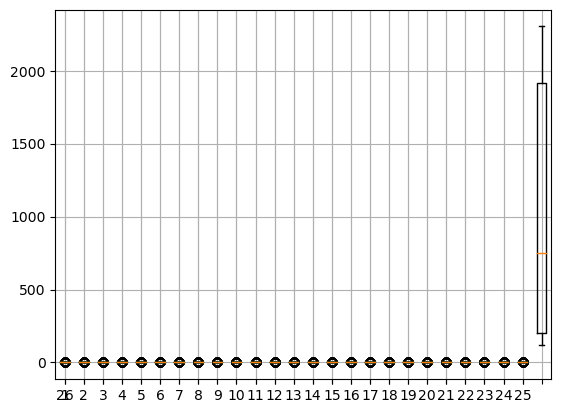

In [29]:
# Create box plot
plt.boxplot(md)



# Show the plot
plt.show()

In [30]:
import pandas as pd

# Assuming you have already created the DataFrame named 'md'

# Check the current columns in the DataFrame
print(md.columns)

# Drop the 'EOG-right' column
md.drop('EOG-right', axis=1, inplace=True)

# Check the columns after dropping
print(md.columns)


Index(['EEG-Fz', 'EEG-0', 'EEG-1', 'EEG-2', 'EEG-3', 'EEG-4', 'EEG-5',
       'EEG-C3', 'EEG-6', 'EEG-Cz', 'EEG-7', 'EEG-C4', 'EEG-8', 'EEG-9',
       'EEG-10', 'EEG-11', 'EEG-12', 'EEG-13', 'EEG-14', 'EEG-Pz', 'EEG-15',
       'EEG-16', 'EOG-left', 'EOG-central', 'EOG-right', 'Timestamp'],
      dtype='object')
Index(['EEG-Fz', 'EEG-0', 'EEG-1', 'EEG-2', 'EEG-3', 'EEG-4', 'EEG-5',
       'EEG-C3', 'EEG-6', 'EEG-Cz', 'EEG-7', 'EEG-C4', 'EEG-8', 'EEG-9',
       'EEG-10', 'EEG-11', 'EEG-12', 'EEG-13', 'EEG-14', 'EEG-Pz', 'EEG-15',
       'EEG-16', 'EOG-left', 'EOG-central', 'Timestamp'],
      dtype='object')


In [31]:
from sklearn.preprocessing import StandardScaler

# Remove any rows with missing values
md.dropna(inplace=True)

# Standardize the data using the StandardScaler
scaler = StandardScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(md.iloc[:, :-1]), columns=md.columns[:-1])

In [37]:
eeg_columns = ['EEG-Fz', 'EEG-0', 'EEG-1', 'EEG-2', 'EEG-3', 'EEG-4', 'EEG-5', 'EEG-C3', 'EEG-6', 'EEG-Cz', 'EEG-7', 'EEG-C4', 'EEG-8', 'EEG-9', 'EEG-10', 'EEG-11', 'EEG-12', 'EEG-13', 'EEG-14', 'EEG-Pz', 'EEG-15', 'EEG-16']

scaled_df["Label"] = scaled_df.apply(lambda x: 1 if any(x[col] > 0.5 for col in eeg_columns) else 0, axis=1)


In [38]:
scaled_df

EEG-Fz    EEG-0     EEG-1     EEG-2     EEG-3     EEG-4     EEG-5  \
0   -0.320923 -0.32112 -0.321063 -0.321006 -0.320955 -0.320906 -0.321204   
1   -0.320923 -0.32112 -0.321063 -0.321006 -0.320955 -0.320906 -0.321204   
2   -0.320923 -0.32112 -0.321063 -0.321006 -0.320955 -0.320906 -0.321204   
3   -0.320923 -0.32112 -0.321063 -0.321006 -0.320955 -0.320906 -0.321204   
4   -0.320923 -0.32112 -0.321063 -0.321006 -0.320955 -0.320906 -0.321204   
..        ...      ...       ...       ...       ...       ...       ...   
657 -0.320923 -0.32112 -0.321063 -0.321006 -0.320955 -0.320906 -0.321204   
658 -0.320923 -0.32112 -0.321063 -0.321006 -0.320955 -0.320906 -0.321204   
659 -0.320923 -0.32112 -0.321063 -0.321006 -0.320955 -0.320906 -0.321204   
660 -0.320923 -0.32112 -0.321063 -0.321006 -0.320955 -0.320906 -0.321204   
661 -0.320923 -0.32112 -0.321063 -0.321006 -0.320955 -0.320906 -0.321204   

       EEG-C3     EEG-6    EEG-Cz  ...    EEG-11    EEG-12   EEG-13    EEG-14  \
0   -0.321152 -0.321124 -0.321041  ... -0.321059 -0.321029 -0.32101 -0.321108   
1   -0.321152 -0.321124 -0.321041  ... -0.321059 -0.321029 -0.32101 -0.321108   
2   -0.321152 -0.321124 -0.321041  ... -0.321059 -0.321029 -0.32101 -0.321108   
3   -0.321152 -0.321124 -0.321041  ... -0.321059 -0.321029 -0.32101 -0.321108   
4   -0.321152 -0.321124 -0.321041  ... -0.321059 -0.321029 -0.32101 -0.321108   
..        ...       ...       ...  ...       ...       ...      ...       ...   
657 -0.321152 -0.321124 -0.321041  ... -0.321059 -0.321029 -0.32101 -0.321108   
658 -0.321152 -0.321124 -0.321041  ... -0.321059 -0.321029 -0.32101 -0.321108   
659 -0.321152 -0.321124 -0.321041  ... -0.321059 -0.321029 -0.32101 -0.321108   
660 -0.321152 -0.321124 -0.321041  ... -0.321059 -0.321029 -0.32101 -0.321108   
661 -0.321152 -0.321124 -0.321041  ... -0.321059 -0.321029 -0.32101 -0.321108   

       EEG-Pz    EEG-15   EEG-16  EOG-left  EOG-central  Label  
0   -0.321077 -0.321065 -0.32101 -0.321445    -0.321367      0  
1   -0.321077 -0.321065 -0.32101 -0.321445    -0.321367      0  
2   -0.321077 -0.321065 -0.32101 -0.321445    -0.321367      0  
3   -0.321077 -0.321065 -0.32101 -0.321445    -0.321367      0  
4   -0.321077 -0.321065 -0.32101 -0.321445    -0.321367      0  
..        ...       ...      ...       ...          ...    ...  
657 -0.321077 -0.321065 -0.32101 -0.321445    -0.321367      0  
658 -0.321077 -0.321065 -0.32101 -0.321445    -0.321367      0  
659 -0.321077 -0.321065 -0.32101 -0.321445    -0.321367      0  
660 -0.321077 -0.321065 -0.32101 -0.321445    -0.321367      0  
661 -0.321077 -0.321065 -0.32101 -0.321445    -0.321367      0  

[662 rows x 25 columns]

# Logistic Regression 

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X = scaled_df.drop('Label', axis=1)
y = scaled_df['Label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the logistic regression model on the training data
lr = LogisticRegression()
lr.fit(X_train, y_train)

# Predict on the test data and calculate accuracy
y_pred = lr.predict(X_test)
accuracy = lr.score(X_test, y_test)
print("Accuracy:", accuracy)


print('Classification Report:\n', classification_report(y_test, y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
print('Accuracy Score:', accuracy_score(y_test, y_pred))

Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       159
           1       1.00      1.00      1.00        14

    accuracy                           1.00       173
   macro avg       1.00      1.00      1.00       173
weighted avg       1.00      1.00      1.00       173

Confusion Matrix:
 [[159   0]
 [  0  14]]
Accuracy Score: 1.0


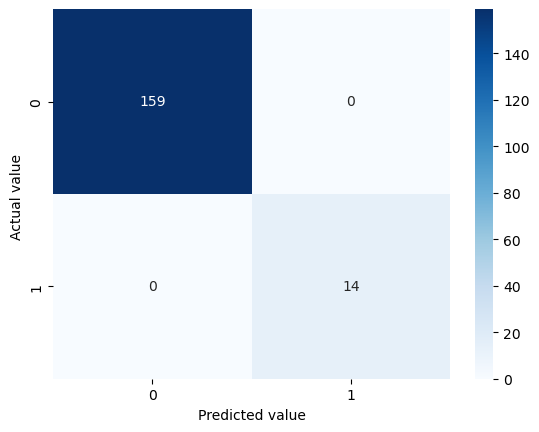

In [29]:
# make predictions using the model and test set
y_pred = lr.predict(X_test)

# create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# plot the confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted value')
plt.ylabel('Actual value ')
plt.show()

# logistic regression and manually implement 3-fold cross-validation

In [34]:
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler

# Assuming you have loaded your dataset into the "scaled_df" DataFrame
# Assuming the target variable is named "target" and the features are in the remaining columns

# Extract the target variable and features from the dataset
X = scaled_df.drop('Label', axis=1)
y = scaled_df['Label']


# Perform 3-fold cross-validation with Logistic Regression
logistic_classifier = LogisticRegression()

# Calculate the size of each fold
fold_size = len(X) // 3

# Initialize lists to store accuracy scores for each fold
cv_scores = []

# Perform 3-fold cross-validation
for i in range(3):
    # Split the data into training and testing sets for this fold
    test_indices = range(i * fold_size, (i + 1) * fold_size)
    train_indices = [idx for idx in range(len(X)) if idx not in test_indices]
    
    X_train, y_train = X.iloc[train_indices], y.iloc[train_indices]
    X_test, y_test = X.iloc[test_indices], y.iloc[test_indices]
    
    # Scale the data (if needed) using MinMaxScaler
    scaler = MinMaxScaler(feature_range=(0, 1))
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Train the logistic classifier on the training set for this fold
    logistic_classifier.fit(X_train_scaled, y_train)
    
    # Evaluate the model on the testing set for this fold
    accuracy = logistic_classifier.score(X_test_scaled, y_test)
    
    # Store the accuracy score for this fold
    cv_scores.append(accuracy)

# Print the cross-validation scores for each fold
print("Cross-validation scores:", cv_scores)

# Print the average cross-validation accuracy
average_accuracy = sum(cv_scores) / len(cv_scores)
print("Average cross-validation accuracy:", average_accuracy)


Cross-validation scores: [1.0, 1.0, 1.0]
Average cross-validation accuracy: 1.0


In this code, we use the scikit-learn library to perform logistic regression and manually implement 3-fold cross-validation. The dataset "scaled_df" is divided into three equal sets, and for each fold, one set is used for testing, and the remaining two sets are used for training.

We loop three times, where each time, we create a training set and a testing set from "scaled_df." The training set consists of the two sets not selected for testing, and the testing set consists of one set for testing. We then scale the data using MinMaxScaler, train the logistic classifier on the training set, and evaluate its accuracy on the testing set.

Finally, we calculate the average accuracy from the three folds to get an overall estimation of the model's performance using 3-fold cross-validation.

# 3-fold cross-validation with an LSTM model 

In [36]:
pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [40]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Assuming you have already loaded your dataset and preprocessed it into "scaled_df"
# Replace this with your actual data loading and preprocessing steps

# Assuming your target column is named 'target_column'
X = scaled_df.drop('Label', axis=1).values
y = scaled_df['Label'].values

# Perform 3-fold cross-validation
n_splits = 3
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# Lists to store evaluation metrics for each fold
losses = []
accuracies = []

for train_index, test_index in kf.split(X):
    # Split data into training and testing sets for this fold
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Reshape input data for LSTM (samples, time steps, features)
    num_time_steps = 1  # You can adjust this based on your data's time sequence length
    X_train = X_train.reshape(X_train.shape[0], num_time_steps, X_train.shape[1])
    X_test = X_test.reshape(X_test.shape[0], num_time_steps, X_test.shape[1])

    # Build the LSTM model
    model = Sequential()
    model.add(LSTM(units=50, input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')

    # Train the model on the training data for this fold
    model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0)

    # Evaluate the model on the test data for this fold
    loss = model.evaluate(X_test, y_test, verbose=0)
    accuracy = 1.0 - loss  # Since it's mean squared error, we can consider it as the inverse of the loss

    # Store the evaluation metrics for this fold
    losses.append(loss)
    accuracies.append(accuracy)

# Calculate the mean and standard deviation of the evaluation metrics
mean_loss = np.mean(losses)
std_loss = np.std(losses)
mean_accuracy = np.mean(accuracies)
std_accuracy = np.std(accuracies)

print("Mean Loss:", mean_loss)
print("Standard Deviation Loss:", std_loss)
print("Mean Accuracy:", mean_accuracy)
print("Standard Deviation Accuracy:", std_accuracy)


Mean Loss: 2.159832324840257e-07
Standard Deviation Loss: 1.434215552077324e-07
Mean Accuracy: 0.9999997840167675
Standard Deviation Accuracy: 1.434215552077324e-07


# LSTM for Deep learning model

In [32]:


# Assuming you have already loaded the "scaled_df" dataframe and imported necessary libraries

scaler = MinMaxScaler(feature_range=(0, 1))
columns = ['EEG-Fz', 'EEG-0', 'EEG-1', 'EEG-2', 'EEG-3', 'EEG-4', 'EEG-5', 'EEG-C3', 'EEG-6', 'EEG-Cz', 'EEG-7',
           'EEG-C4', 'EEG-8', 'EEG-9', 'EEG-10', 'EEG-11', 'EEG-12', 'EEG-13', 'EEG-14', 'EEG-Pz', 'EEG-15', 'EEG-16',
           'EOG-left']

time_series_normalized = []
for col in columns:
    data = scaled_df[col].values.reshape(-1, 1)
    data_normalized = scaler.fit_transform(data)
    time_series_normalized.append(data_normalized)

# Combine the normalized time series into a single array
time_series_combined = np.hstack(time_series_normalized)

# Split the data into train and test sets
train_size = int(len(time_series_combined) * 0.67)
train_data, test_data = time_series_combined[:train_size], time_series_combined[train_size:]

# Create a function to prepare the data for LSTM
def prepare_data(data, look_back=1):
    X, Y = [], []
    for i in range(len(data) - look_back):
        X.append(data[i:(i + look_back)])
        Y.append(data[i + look_back])
    return np.array(X), np.array(Y)

# Prepare the data for LSTM
look_back = 10  # You can adjust this parameter depending on your problem
X_train, y_train = prepare_data(train_data, look_back)
X_test, y_test = prepare_data(test_data, look_back)

# Reshape the input data to fit the LSTM format (samples, timesteps, features)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], len(columns)))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], len(columns)))

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, input_shape=(look_back, len(columns))))
model.add(Dense(len(columns)))  # Output layer should have the same number of features as input
model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=1, verbose=2)

# Make predictions
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Inverse transform the predictions to original scale
train_predictions = scaler.inverse_transform(train_predictions)
y_train_original = scaler.inverse_transform(y_train)
test_predictions = scaler.inverse_transform(test_predictions)
y_test_original = scaler.inverse_transform(y_test)

# Calculate the root mean squared error (RMSE) to evaluate the model's accuracy
train_rmse = np.sqrt(mean_squared_error(y_train_original, train_predictions))
test_rmse = np.sqrt(mean_squared_error(y_test_original, test_predictions))

print("Train RMSE:", train_rmse)
print("Test RMSE:", test_rmse)


Epoch 1/100
567/567 - 4s - loss: 0.0171 - 4s/epoch - 8ms/step
Epoch 2/100
567/567 - 2s - loss: 0.0083 - 2s/epoch - 4ms/step
Epoch 3/100
567/567 - 2s - loss: 0.0076 - 2s/epoch - 4ms/step
Epoch 4/100
567/567 - 2s - loss: 0.0070 - 2s/epoch - 3ms/step
Epoch 5/100
567/567 - 2s - loss: 0.0075 - 2s/epoch - 3ms/step
Epoch 6/100
567/567 - 2s - loss: 0.0070 - 2s/epoch - 4ms/step
Epoch 7/100
567/567 - 3s - loss: 0.0070 - 3s/epoch - 4ms/step
Epoch 8/100
567/567 - 2s - loss: 0.0072 - 2s/epoch - 4ms/step
Epoch 9/100
567/567 - 2s - loss: 0.0071 - 2s/epoch - 4ms/step
Epoch 10/100
567/567 - 2s - loss: 0.0069 - 2s/epoch - 3ms/step
Epoch 11/100
567/567 - 2s - loss: 0.0072 - 2s/epoch - 4ms/step
Epoch 12/100
567/567 - 2s - loss: 0.0068 - 2s/epoch - 4ms/step
Epoch 13/100
567/567 - 2s - loss: 0.0068 - 2s/epoch - 3ms/step
Epoch 14/100
567/567 - 2s - loss: 0.0065 - 2s/epoch - 3ms/step
Epoch 15/100
567/567 - 2s - loss: 0.0071 - 2s/epoch - 3ms/step
Epoch 16/100
567/567 - 2s - loss: 0.0067 - 2s/epoch - 3ms/step
E

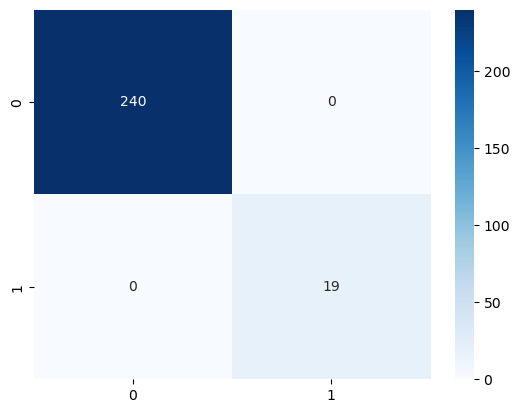

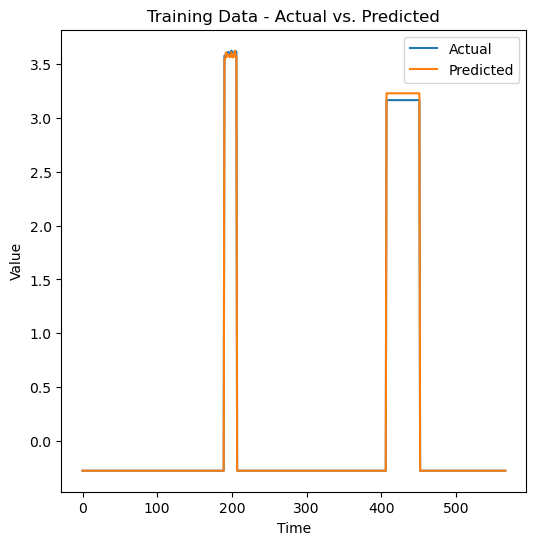

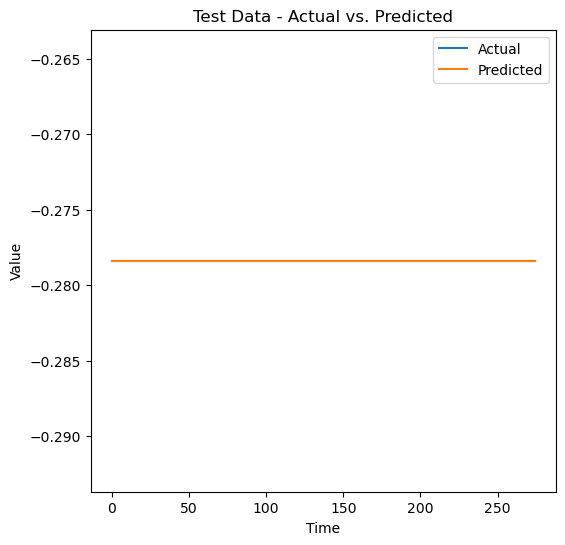

In [33]:
import matplotlib.pyplot as plt

# Combine the original time series data and the predicted values
train_actual_predicted = np.concatenate((y_train_original, train_predictions), axis=1)
test_actual_predicted = np.concatenate((y_test_original, test_predictions), axis=1)

# Create a function to plot the time series data
def plot_time_series(data, title):
    plt.figure(figsize=(6, 6))
    plt.plot(data[:, 0], label='Actual')
    plt.plot(data[:, 1], label='Predicted')
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.title(title)
    plt.legend()
    plt.show()

# Plot the training data
plot_time_series(train_actual_predicted, title='Training Data - Actual vs. Predicted')

# Plot the test data
plot_time_series(test_actual_predicted, title='Test Data - Actual vs. Predicted')